In [1]:
##############################
#Author Skye Ouyang
#Date: 24th Apr
##############################
import pandas as pd
import numpy as np
from pandas import DataFrame
import sklearn
import requests
import StringIO
import json
import re

In [21]:
base_path='./'
whole_data=DataFrame.from_csv(base_path+'Text Analytics.csv',index_col='BOOK ID')
whole_data

,Label,Avg_sen_len,Blank,Avg_num_word,Avg_word_len,num_of_weapon,num_of_bloody,num_of_mysterious,num_of_PopWord,Exclamation_Ratio,Ques_Mark_Ratio,Period_Ratio,Stopwords_Ratio,Avg_sentiment,num_of_Unpop
BOOK ID,,,,,,,,,,,,,,,
1,1,66.21,13.50,15.13,4.38,34,61,35,30747,0.001428,0.070812,0.927761,0.431888,-0.004217,290
2,1,53.26,11.76,13.30,4.00,21,41,18,14681,0.004876,0.082004,0.913121,0.409934,-0.005893,67
3,1,60.19,12.39,15.62,3.85,17,34,15,14669,0.021185,0.127748,0.851067,0.376801,-0.005749,212
4,1,52.72,10.56,12.32,4.28,18,31,19,10815,0.037219,0.131997,0.830785,0.403794,-0.003993,199
5,1,82.84,19.73,21.67,3.82,18,16,11,13146,0.001936,0.077184,0.920881,0.445443,-0.003967,127
6,1,78.68,17.08,19.38,4.06,37,74,46,62775,0.039811,0.094483,0.865706,0.449838,-0.002384,419
7,1,100.66,21.16,24.28,4.15,26,69,37,28809,0.045664,0.085841,0.868496,0.434448,-0.003804,1547
8,1,50.32,10.91,13.31,3.78,33,53,22,26800,0.002528,0.086703,0.910769,0.402746,-0.004073,339
9,1,83.64,18.06,20.42,4.10,19,36,21,7448,0.025133,0.061502,0.913365,0.444903,-0.007596,88


In [22]:
whole_data.head()

,Label,Avg_sen_len,Blank,Avg_num_word,Avg_word_len,num_of_weapon,num_of_bloody,num_of_mysterious,num_of_PopWord,Exclamation_Ratio,Ques_Mark_Ratio,Period_Ratio,Stopwords_Ratio,Avg_sentiment,num_of_Unpop
BOOK ID,,,,,,,,,,,,,,,
1,1,66.21,13.50,15.13,4.38,34,61,35,30747,0.001428,0.070812,0.927761,0.431888,-0.004217,290
2,1,53.26,11.76,13.30,4.00,21,41,18,14681,0.004876,0.082004,0.913121,0.409934,-0.005893,67
3,1,60.19,12.39,15.62,3.85,17,34,15,14669,0.021185,0.127748,0.851067,0.376801,-0.005749,212
4,1,52.72,10.56,12.32,4.28,18,31,19,10815,0.037219,0.131997,0.830785,0.403794,-0.003993,199
5,1,82.84,19.73,21.67,3.82,18,16,11,13146,0.001936,0.077184,0.920881,0.445443,-0.003967,127


In [23]:
whole_data.describe()

,Label,Avg_sen_len,Blank,Avg_num_word,Avg_word_len,num_of_weapon,num_of_bloody,num_of_mysterious,num_of_PopWord,Exclamation_Ratio,Ques_Mark_Ratio,Period_Ratio,Stopwords_Ratio,Avg_sentiment,num_of_Unpop
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.500000,64.510850,13.480000,15.734350,4.098200,26.610000,43.670000,26.240000,21469.220000,0.016519,0.105939,0.877542,0.394061,-0.004905,432.990000
std,0.501255,13.181462,2.745602,3.065132,0.165033,7.931104,14.264941,9.525021,13997.464919,0.020156,0.030764,0.036451,0.054025,0.001592,1542.293378
min,0.000000,43.770000,8.670000,10.810000,3.660000,6.000000,5.000000,1.000000,3240.000000,0.000000,0.002588,0.753951,0.049587,-0.013573,0.000000
25%,0.000000,55.367500,11.562500,13.535000,4.010000,21.750000,34.000000,20.750000,14303.500000,0.003989,0.083422,0.854945,0.383138,-0.005741,120.500000
50%,0.500000,61.850000,12.855000,15.110000,4.100000,26.000000,44.000000,25.000000,18220.500000,0.008691,0.106156,0.881681,0.398482,-0.004863,208.000000
75%,1.000000,69.995000,14.817500,17.130000,4.190000,32.000000,52.000000,32.000000,24242.250000,0.021320,0.125323,0.902412,0.416372,-0.004017,351.000000
max,1.000000,128.800000,25.760000,27.960000,4.610000,52.000000,92.000000,55.000000,107384.000000,0.127455,0.194009,0.994177,0.462138,0.000059,18762.000000


In [24]:
Whole_data=(whole_data-whole_data.min())/(whole_data.max()-whole_data.min())
whole_data

,Label,Avg_sen_len,Blank,Avg_num_word,Avg_word_len,num_of_weapon,num_of_bloody,num_of_mysterious,num_of_PopWord,Exclamation_Ratio,Ques_Mark_Ratio,Period_Ratio,Stopwords_Ratio,Avg_sentiment,num_of_Unpop
BOOK ID,,,,,,,,,,,,,,,
1,1,66.21,13.50,15.13,4.38,34,61,35,30747,0.001428,0.070812,0.927761,0.431888,-0.004217,290
2,1,53.26,11.76,13.30,4.00,21,41,18,14681,0.004876,0.082004,0.913121,0.409934,-0.005893,67
3,1,60.19,12.39,15.62,3.85,17,34,15,14669,0.021185,0.127748,0.851067,0.376801,-0.005749,212
4,1,52.72,10.56,12.32,4.28,18,31,19,10815,0.037219,0.131997,0.830785,0.403794,-0.003993,199
5,1,82.84,19.73,21.67,3.82,18,16,11,13146,0.001936,0.077184,0.920881,0.445443,-0.003967,127
6,1,78.68,17.08,19.38,4.06,37,74,46,62775,0.039811,0.094483,0.865706,0.449838,-0.002384,419
7,1,100.66,21.16,24.28,4.15,26,69,37,28809,0.045664,0.085841,0.868496,0.434448,-0.003804,1547
8,1,50.32,10.91,13.31,3.78,33,53,22,26800,0.002528,0.086703,0.910769,0.402746,-0.004073,339
9,1,83.64,18.06,20.42,4.10,19,36,21,7448,0.025133,0.061502,0.913365,0.444903,-0.007596,88


In [25]:
Whole_data.describe()

,Label,Avg_sen_len,Blank,Avg_num_word,Avg_word_len,num_of_weapon,num_of_bloody,num_of_mysterious,num_of_PopWord,Exclamation_Ratio,Ques_Mark_Ratio,Period_Ratio,Stopwords_Ratio,Avg_sentiment,num_of_Unpop
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.500000,0.243924,0.281451,0.287134,0.461263,0.448043,0.444483,0.467407,0.175039,0.129606,0.539917,0.514478,0.834986,0.635879,0.023078
std,0.501255,0.155021,0.160655,0.178725,0.173719,0.172415,0.163965,0.176389,0.134405,0.158138,0.160715,0.151734,0.130953,0.116756,0.082203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.136393,0.169251,0.158892,0.368421,0.342391,0.333333,0.365741,0.106233,0.031299,0.422285,0.420415,0.808510,0.574520,0.006423
50%,0.500000,0.212631,0.244880,0.250729,0.463158,0.434783,0.448276,0.444444,0.143844,0.068185,0.541049,0.531708,0.845703,0.638899,0.011086
75%,1.000000,0.308421,0.359713,0.368513,0.557895,0.565217,0.540230,0.574074,0.201665,0.167277,0.641179,0.618006,0.889067,0.701004,0.018708
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Calculate correlation and building heat map

In [26]:
corrmat = Whole_data.corr()
corrmat

,Label,Avg_sen_len,Blank,Avg_num_word,Avg_word_len,num_of_weapon,num_of_bloody,num_of_mysterious,num_of_PopWord,Exclamation_Ratio,Ques_Mark_Ratio,Period_Ratio,Stopwords_Ratio,Avg_sentiment,num_of_Unpop
Label,1.000000,-0.011724,-0.008069,0.017057,-0.165229,0.144099,0.080820,0.081043,0.025593,0.088009,-0.134481,0.064837,-0.020507,-0.048014,-0.111256
Avg_sen_len,-0.011724,1.000000,0.984967,0.979242,0.251266,-0.031755,0.166153,0.265984,0.130755,0.247384,-0.320978,0.134113,-0.019227,0.142893,-0.005495
Blank,-0.008069,0.984967,1.000000,0.985378,0.152948,-0.052497,0.128518,0.231573,0.115210,0.201513,-0.314627,0.154117,0.048923,0.150920,-0.037635
Avg_num_word,0.017057,0.979242,0.985378,1.000000,0.055390,-0.053303,0.137360,0.229812,0.116027,0.248042,-0.281382,0.100331,0.007334,0.155410,-0.035719
Avg_word_len,-0.165229,0.251266,0.152948,0.055390,1.000000,0.115597,0.187885,0.255186,0.115421,0.083783,-0.216982,0.136805,-0.123713,0.002357,0.176600
num_of_weapon,0.144099,-0.031755,-0.052497,-0.053303,0.115597,1.000000,0.674252,0.537257,0.193223,-0.031040,0.099642,-0.066934,0.190961,0.026211,-0.105004
num_of_bloody,0.080820,0.166153,0.128518,0.137360,0.187885,0.674252,1.000000,0.797364,0.236442,0.110291,0.054063,-0.106615,0.287134,0.076268,-0.144838
num_of_mysterious,0.081043,0.265984,0.231573,0.229812,0.255186,0.537257,0.797364,1.000000,0.223923,0.082695,-0.090107,0.030324,0.331356,0.129078,-0.156637
num_of_PopWord,0.025593,0.130755,0.115210,0.116027,0.115421,0.193223,0.236442,0.223923,1.000000,0.065132,-0.089374,0.039416,0.072630,0.531727,0.043416
Exclamation_Ratio,0.088009,0.247384,0.201513,0.248042,0.083783,-0.031040,0.110291,0.082695,0.065132,1.000000,-0.019385,-0.536594,-0.199896,0.088052,0.089570


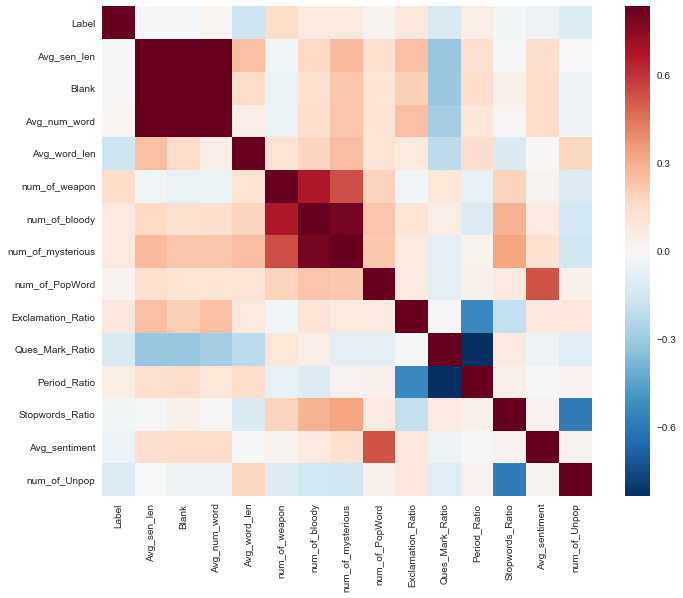

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
# set up the matplotlib figure
f, ax=plt.subplots(figsize=(12,9))
# draw the heatmap using seaborn
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

In [28]:
c = Whole_data.corr().abs()
s = c.unstack()
so = s.order(kind='quicksort')
so[so > 0.9 ]

C:\Users\Skyeo\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


Avg_num_word       Avg_sen_len          0.979242
Avg_sen_len        Avg_num_word         0.979242
                   Blank                0.984967
Blank              Avg_sen_len          0.984967
                   Avg_num_word         0.985378
Avg_num_word       Blank                0.985378
Label              Label                1.000000
num_of_mysterious  num_of_mysterious    1.000000
Stopwords_Ratio    Stopwords_Ratio      1.000000
Period_Ratio       Period_Ratio         1.000000
Ques_Mark_Ratio    Ques_Mark_Ratio      1.000000
Exclamation_Ratio  Exclamation_Ratio    1.000000
num_of_PopWord     num_of_PopWord       1.000000
num_of_bloody      num_of_bloody        1.000000
num_of_weapon      num_of_weapon        1.000000
Avg_word_len       Avg_word_len         1.000000
Avg_num_word       Avg_num_word         1.000000
Blank              Blank                1.000000
Avg_sen_len        Avg_sen_len          1.000000
Avg_sentiment      Avg_sentiment        1.000000
num_of_Unpop       n

# Spliting traing and test data set

separate independent and dependent variable for regression

In [29]:
data_y = Whole_data['Label']
data_X = Whole_data.ix[:,Whole_data.columns.difference(['Label','Avg_sen_len','Blank'])]
print data_y.shape
print data_X.shape
print data_y.dtype
print data_X.dtypes

(200L,)
(200, 12)
float64
Avg_num_word         float64
Avg_sentiment        float64
Avg_word_len         float64
Exclamation_Ratio    float64
Period_Ratio         float64
Ques_Mark_Ratio      float64
Stopwords_Ratio      float64
num_of_PopWord       float64
num_of_Unpop         float64
num_of_bloody        float64
num_of_mysterious    float64
num_of_weapon        float64
dtype: object


In [30]:
data_X.describe()

,Avg_num_word,Avg_sentiment,Avg_word_len,Exclamation_Ratio,Period_Ratio,Ques_Mark_Ratio,Stopwords_Ratio,num_of_PopWord,num_of_Unpop,num_of_bloody,num_of_mysterious,num_of_weapon
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.287134,0.635879,0.461263,0.129606,0.514478,0.539917,0.834986,0.175039,0.023078,0.444483,0.467407,0.448043
std,0.178725,0.116756,0.173719,0.158138,0.151734,0.160715,0.130953,0.134405,0.082203,0.163965,0.176389,0.172415
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158892,0.574520,0.368421,0.031299,0.420415,0.422285,0.808510,0.106233,0.006423,0.333333,0.365741,0.342391
50%,0.250729,0.638899,0.463158,0.068185,0.531708,0.541049,0.845703,0.143844,0.011086,0.448276,0.444444,0.434783
75%,0.368513,0.701004,0.557895,0.167277,0.618006,0.641179,0.889067,0.201665,0.018708,0.540230,0.574074,0.565217
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Comparing the performance of models

In [31]:
#split training and test datasets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (140, 12)
X_test : (60, 12)
y_train : (140L,)
y_test : (60L,)


In [32]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [33]:
#prepare models
X = X_train
Y = y_train
seed=4
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB',GradientBoostingClassifier()))
models.append(('NN', MLPClassifier()))

In [34]:
#evaluate the models
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.557143 (0.104978)
RF: 0.692857 (0.090633)
GB: 0.700000 (0.126974)


C:\Users\Skyeo\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


NN: 0.585714 (0.089214)


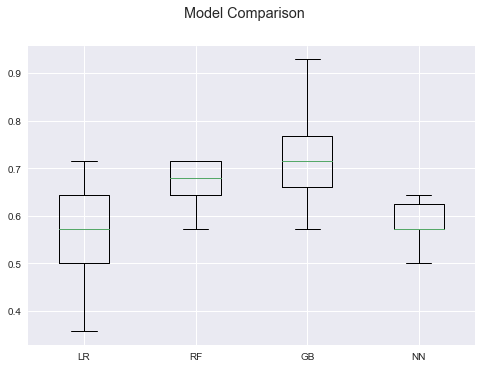

In [35]:
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [36]:
#test the impact of tree size on prediction accuracy
trees = range(25)
accuracy = np.zeros(25)
for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx + 1)
    classifier=classifier.fit(X_train,y_train)
    predictions=classifier.predict(X_test)
    accuracy[idx]=accuracy_score(y_test,predictions)

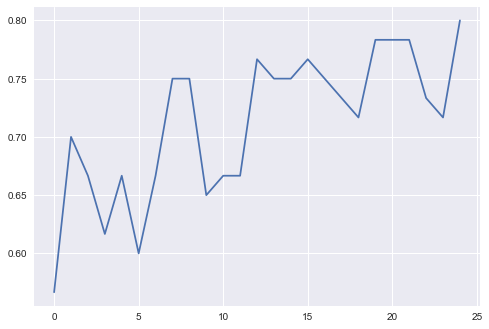

In [37]:
#plot the effect of tree size
plt.cla()
plt.plot(trees,accuracy)
plt.show()

In [38]:
#fit in random forest argorithm
print'Random Forest'
rf = RandomForestClassifier(n_estimators=25)
print 'Fitting model'
rf_fit=rf.fit(X_train,y_train)
print 'Predcting on test set'
y_pred_rf =rf.predict(X_test)
print confusion_matrix(y_test,y_pred_rf)
print accuracy_score(y_test,y_pred_rf)
print f1_score(y_test,y_pred_rf)

Random Forest
Fitting model
Predcting on test set
[[22  9]
 [ 5 24]]
0.766666666667
0.774193548387


In [40]:
#fit in GradientBoosting
print'Gradient Boosting'
gb = GradientBoostingClassifier(n_estimators=250,learning_rate=0.05, max_depth=10, max_features = 0.8, min_samples_leaf=4, random_state=0,subsample =0.9)
print 'Fitting model'
gb.fit(X_train,y_train)
print 'Predicting on test set'
y_pred_gb = gb.predict(X_test)
print confusion_matrix(y_test,y_pred_gb)
print accuracy_score(y_test,y_pred_gb)
print f1_score(y_test,y_pred_gb)

Gradient Boosting
Fitting model
Predicting on test set
[[24  7]
 [ 3 26]]
0.833333333333
0.838709677419


# ensemble RF and GB

In [41]:
y_pred_ensemble=[]
for i in range(len(y_pred_rf)):
    if (float(y_pred_gb[i]) + float(y_pred_rf[i]))/2 > 0.5:
        y_pred_ensemble.append(1)
    else:
        y_pred_ensemble.append(0)
print y_pred_ensemble

[1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1]


In [42]:
print confusion_matrix(y_test,y_pred_ensemble)
print accuracy_score(y_test,y_pred_ensemble)
print f1_score(y_test,y_pred_ensemble)

[[26  5]
 [ 5 24]]
0.833333333333
0.827586206897


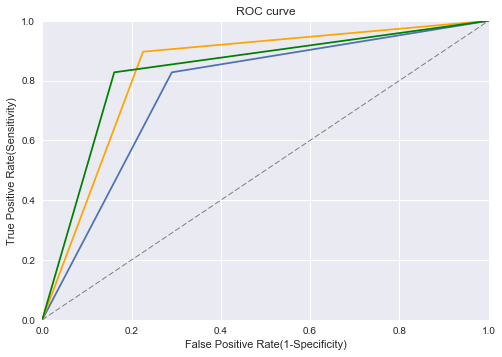

Auc for random forest is 0.768631813126
Auc for Gradient Boosting is 0.835372636263
Auc for ensemble is 0.833147942158


In [43]:
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, y_pred_rf)
fpr_gb,tpr_gb, _= metrics.roc_curve(y_test, y_pred_gb)
fpr_en,tpr_en, _= metrics.roc_curve(y_test, y_pred_ensemble)
plt.plot(fpr_rf,tpr_rf)
plt.plot(fpr_gb,tpr_gb,color='orange')
plt.plot(fpr_en,tpr_en,color='green')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.grid(True)
plt.plot((0.0,1.0),(0.0,1.0),color='grey',linewidth=1,linestyle='--')
plt.show()
print ('Auc for random forest is ' + str(auc(fpr_rf, tpr_rf)))
print ('Auc for Gradient Boosting is ' + str(auc(fpr_gb,tpr_gb))) 
print ('Auc for ensemble is ' + str(auc(fpr_en,tpr_en))) 

# Calculating the feature importance

In [44]:
# get the feature importance from rf
names = data_X.columns.values
print "Features sorted by their score"
print sorted(zip(map(lambda x: round(x,4),rf.feature_importances_),names),reverse=True)

Features sorted by their score
[(0.1545, 'num_of_Unpop'), (0.1227, 'Avg_num_word'), (0.1054, 'num_of_weapon'), (0.098, 'num_of_mysterious'), (0.0944, 'num_of_PopWord'), (0.0887, 'Avg_word_len'), (0.0632, 'num_of_bloody'), (0.0615, 'Ques_Mark_Ratio'), (0.0596, 'Exclamation_Ratio'), (0.0562, 'Stopwords_Ratio'), (0.0516, 'Period_Ratio'), (0.0443, 'Avg_sentiment')]


In [46]:
# get the feature importance from gradient boosting
names = data_X.columns.values
print "Features sorted by their score"
print sorted(zip(map(lambda x: round(x,4),gb.feature_importances_),names),reverse=True)

Features sorted by their score
[(0.1479, 'num_of_Unpop'), (0.1213, 'Avg_num_word'), (0.1182, 'num_of_PopWord'), (0.0958, 'num_of_weapon'), (0.0856, 'Avg_word_len'), (0.0841, 'num_of_mysterious'), (0.0755, 'Exclamation_Ratio'), (0.0682, 'Ques_Mark_Ratio'), (0.0539, 'Stopwords_Ratio'), (0.0487, 'Avg_sentiment'), (0.0473, 'num_of_bloody'), (0.0416, 'Period_Ratio')]


In [47]:
# ensemble the importance of two models
feature_importance=[]
for i in range(11):
    feature_importance.append((float(gb.feature_importances_[i])+float(rf.feature_importances_[i]))/2)

In [49]:
print sorted(zip(map(lambda x: round(x,4),feature_importance),names),reverse=True)

[(0.1512, 'num_of_Unpop'), (0.122, 'Avg_num_word'), (0.1063, 'num_of_PopWord'), (0.091, 'num_of_mysterious'), (0.0871, 'Avg_word_len'), (0.0675, 'Exclamation_Ratio'), (0.0648, 'Ques_Mark_Ratio'), (0.0553, 'num_of_bloody'), (0.055, 'Stopwords_Ratio'), (0.0466, 'Period_Ratio'), (0.0465, 'Avg_sentiment')]


In [50]:
#create parameter for plot
importances=rf.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
print importances
print indices
print std

[ 0.12268741  0.04426264  0.0886653   0.05964071  0.05162043  0.06147414
  0.05619201  0.09437269  0.15445375  0.06321206  0.09799716  0.10542172]
[ 8  0 11 10  7  2  9  5  3  6  4  1]
[ 0.08112524  0.04941199  0.06959888  0.04554655  0.05186177  0.04587771
  0.03920522  0.08241663  0.08837668  0.07420488  0.07040141  0.06745393]


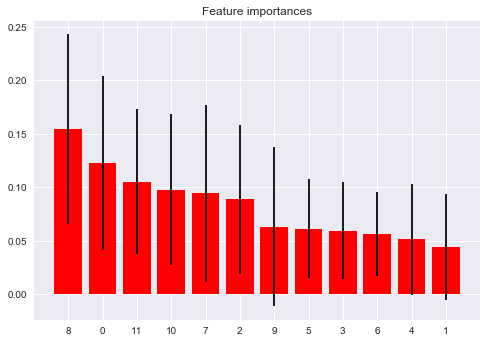

In [51]:
# Plot the feature importances of random forest
import matplotlib.pyplot as plt
plt.figure()
plt.title("Feature importances")
plt.bar(range(data_X.shape[1]), importances[indices],
       color="r", yerr=std[indices],align="center")
plt.xticks(range(data_X.shape[1]), indices)
plt.xlim([-1, data_X.shape[1]])
plt.show()

# The specific results of Random Forest

In [52]:
log_loss(y_test,y_pred_rf,normalize=True)

8.0591677650936884

In [53]:
def score(sss,yyy):
    i=0
    compare = list()
    while i< len(sss):
        if sss[i] == yyy[i]:
            compare.append(1)
        else: 
            compare.append(0)
        i+=1
    return(compare)

In [54]:
ytest=Whole_data['Label'].values

In [55]:
c=score(y_pred_rf,ytest)

In [56]:
float(sum(c))/float(len(c))

0.55

In [57]:
print 'GradientBoosting'
gb = GradientBoostingClassifier()
print 'Fitting model'
gb.fit(X_train,y_train)
print 'Predicting on test set'
y_pred_gb = gb.predict(X_test)

GradientBoosting
Fitting model
Predicting on test set


In [58]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print 'Accuracy:', accuracy_score(y_test, y_pred_rf)
print 'F1 score:', f1_score(y_test, y_pred_rf)
print 'Recall:', recall_score(y_test, y_pred_rf)
print 'Precision:', precision_score(y_test, y_pred_rf)
print '\n clasification report:\n', classification_report(y_test,y_pred_rf)
print '\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf)

Accuracy: 0.766666666667
F1 score: 0.774193548387
Recall: 0.827586206897
Precision: 0.727272727273

 clasification report:
             precision    recall  f1-score   support

        0.0       0.81      0.71      0.76        31
        1.0       0.73      0.83      0.77        29

avg / total       0.77      0.77      0.77        60


 confussion matrix:
[[22  9]
 [ 5 24]]


# Compare the importance of each category

In [59]:
print data_X.columns

Index([u'Avg_num_word', u'Avg_sentiment', u'Avg_word_len',
       u'Exclamation_Ratio', u'Period_Ratio', u'Ques_Mark_Ratio',
       u'Stopwords_Ratio', u'num_of_PopWord', u'num_of_Unpop',
       u'num_of_bloody', u'num_of_mysterious', u'num_of_weapon'],
      dtype='object')


In [60]:
data_X_r_struc = data_X.ix[:,data_X.columns.difference(['Avg_num_word','Avg_word_len','Stopwords_Ratio'])]
data_X_r_pop = data_X.ix[:,data_X.columns.difference(['num_of_PopWord'])]
data_X_r_lexicon = data_X.ix[:,data_X.columns.difference(['num_of_weapon','num_of_bloody','num_of_mysterious'])]
data_X_r_punc = data_X.ix[:,data_X.columns.difference(['Exclamation_Ratio','Period_Ratio','Ques_Mark_Ratio'])]
data_X_r_sent = data_X.ix[:,data_X.columns.difference(['Avg_sentiment'])]

In [61]:
X_train_r_struc, X_test_r_struc, y_train, y_test = train_test_split(data_X_r_struc, data_y, test_size = 0.3, random_state = 0)
X_train_r_pop, X_test_r_pop, y_train, y_test = train_test_split(data_X_r_pop, data_y, test_size = 0.3, random_state = 0)
X_train_r_lexicon, X_test_r_lexicon, y_train, y_test = train_test_split(data_X_r_lexicon, data_y, test_size = 0.3, random_state = 0)
X_train_r_punc, X_test_r_punc, y_train, y_test = train_test_split(data_X_r_punc, data_y, test_size = 0.3, random_state = 0)
X_train_r_sent, X_test_r_sent, y_train, y_test = train_test_split(data_X_r_sent, data_y, test_size = 0.3, random_state = 0)
print("X_train_categories : " + str(X_train_r_struc.shape) + str(X_train_r_pop.shape) + str(X_train_r_lexicon.shape) + str(X_train_r_punc.shape) + str(X_train_r_sent.shape))
print("X_test_categories : " + str(X_test_r_struc.shape) + str(X_test_r_pop.shape) + str(X_test_r_lexicon.shape) + str(X_test_r_punc.shape) + str(X_test_r_sent.shape))

X_train_categories : (140, 9)(140, 11)(140, 9)(140, 9)(140, 11)
X_test_categories : (60, 9)(60, 11)(60, 9)(60, 9)(60, 11)


In [62]:
print 'Fitting model for structure'
rf_fit_r_struc=rf.fit(X_train_r_struc,y_train)
y_pred_rf_r_struc =rf.predict(X_test_r_struc)
print confusion_matrix(y_test,y_pred_rf_r_struc)
print accuracy_score(y_test,y_pred_rf_r_struc)
print f1_score(y_test,y_pred_rf_r_struc)

Fitting model for structure
[[22  9]
 [ 6 23]]
0.75
0.754098360656


In [63]:
print 'Fitting model for pop words'
rf_fit_r_pop=rf.fit(X_train_r_pop,y_train)
y_pred_rf_r_pop =rf.predict(X_test_r_pop)
print confusion_matrix(y_test,y_pred_rf_r_pop)
print accuracy_score(y_test,y_pred_rf_r_pop)
print f1_score(y_test,y_pred_rf_r_pop)

Fitting model for pop words
[[23  8]
 [ 8 21]]
0.733333333333
0.724137931034


In [64]:
print 'Fitting model for specific words usage'
rf_fit_r_lexicon=rf.fit(X_train_r_lexicon,y_train)
y_pred_rf_r_lexicon =rf.predict(X_test_r_lexicon)
print confusion_matrix(y_test,y_pred_rf_r_lexicon)
print accuracy_score(y_test,y_pred_rf_r_lexicon)
print f1_score(y_test,y_pred_rf_r_lexicon)

Fitting model for specific words usage
[[25  6]
 [ 5 24]]
0.816666666667
0.813559322034


In [65]:
print 'Fitting model for punctuation'
rf_fit_r_punc=rf.fit(X_train_r_punc,y_train)
y_pred_rf_r_punc =rf.predict(X_test_r_punc)
print confusion_matrix(y_test,y_pred_rf_r_punc)
print accuracy_score(y_test,y_pred_rf_r_punc)
print f1_score(y_test,y_pred_rf_r_punc)

Fitting model for punctuation
[[17 14]
 [ 3 26]]
0.716666666667
0.753623188406


In [66]:
print 'Fitting model for sentiment'
rf_fit_r_sent=rf.fit(X_train_r_sent,y_train)
y_pred_rf_r_sent =rf.predict(X_test_r_sent)
print confusion_matrix(y_test,y_pred_rf_r_sent)
print accuracy_score(y_test,y_pred_rf_r_sent)
print f1_score(y_test,y_pred_rf_r_sent)

Fitting model for sentiment
[[23  8]
 [ 7 22]]
0.75
0.745762711864


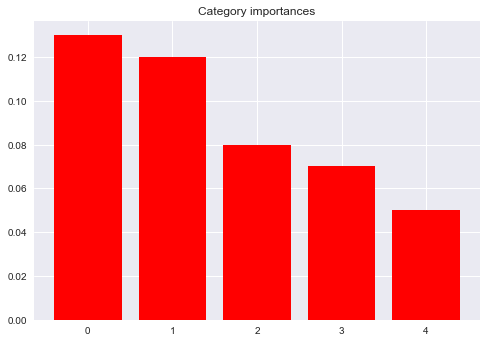

In [67]:
# Plot the category importances of
names = ['Sentence Structure','Topic-Related Words','Popular Words Usage','Punctuation Usage','Sentiment']
importance_category = ['0.13','0.12','0.08','0.07','0.05']
plt.figure()
plt.title("Category importances")
plt.bar(range(len(names)), importance_category,color="r", align="center")
plt.show()

In [347]:
range(6)

[0, 1, 2, 3, 4, 5]